# Data visualisation

In the Notebook we are looking to explore the HANNA data base.

In [137]:
# importations
import csv
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg 
from scipy.special import binom
import scipy.stats as st
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
from sklearn.metrics import f1_score
from utils import *

## Loading the data

In [138]:
data_annotations = pd.read_csv("hanna_stories_annotations.csv")

There are 96 different prompts and thus for each model there are 96 stories.

In [209]:
data_annotations.head()

,Story ID,Prompt,Human,Story,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,Worker ID,Assignment ID,Work time in seconds,Name
0,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,4,4,3,2,4,4,A2VE5IV9OD2SK1,3X87C8JFVHIT235KQ4UTS8264I6SQJ,579.0,None
1,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,5,5,1,3,4,1,A1IZ4NX41GKU4X,3DR23U6WEGL5K0SU6D4J8W9EM9LTE7,82.0,none
2,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,2,2,3,2,2,3,A264NN7JBX4UDQ,3UJ1CZ6IZSW49HMM6C6QUX7F7UV5SA,273.0,none
3,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,5,3,4,4,4,A3CFNUD7VR2E1E,317HQ483IIZJ5SPW508YKC1EP6RINX,117.0,Eric
4,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,4,4,4,4,4,A2VE5IV9OD2SK1,3T3IWE1XGHUUH3IZF4ZJ2DYS57WQTT,751.0,Eric


The different model used are as follow:

In [140]:
data_annotations['Model'].unique()

array(['Human', 'BertGeneration', 'CTRL', 'GPT', 'GPT-2 (tag)', 'GPT-2',
       'RoBERTa', 'XLNet', 'Fusion', 'HINT', 'TD-VAE'], dtype=object)

In [141]:
data_scores = pd.read_csv("hanna_metric_scores.csv")

In [142]:
data_scores

,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,BLEU Ξ§,ROUGE-1 Recall Ξ§,ROUGE-1 Precision Ξ§,...,Repetition-2 ¤§,Repetition-3 ¤§,SUPERT-PS ¤ε,SUPERT-SS ¤ε,BLANC-Tune-PS ¤Δ,BLANC-Help-PS ¤Δ,BLANC-Tune-SS ¤Δ,BLANC-Help-SS ¤Δ,BARTScore-PS ¤Δ,BARTScore-SP ¤Δ
0,Human,"[3.6666666666666665, 5.0, 4.666666666666667, 3...","[3.6666666666666665, 4.666666666666667, 4.6666...","[2.3333333333333335, 4.0, 4.0, 3.0, 3.0, 3.333...","[2.3333333333333335, 3.6666666666666665, 4.333...","[3.3333333333333335, 3.6666666666666665, 4.0, ...","[2.6666666666666665, 4.0, 4.333333333333333, 4...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.10407239819004525, 0.1198501872659176, 0.07...","[0.029288702928870293, 0.03691275167785235, 0....","[0.36060585433665243, 0.30589759827771107, 0.2...","[0.3513956792291503, 0.3298352311450941, 0.273...","[0.0, 0.040983606557377046, -0.011111111111111...","[-0.02608695652173913, 0.0, -0.011111111111111...","[0.058823529411764705, -0.14285714285714285, 0...","[-0.23529411764705882, -0.14285714285714285, 0...","[-4.046356201171875, -4.839603424072266, -4.85...","[-4.624497413635254, -6.575280666351318, -4.77..."
1,BertGeneration,"[1.6666666666666667, 3.0, 1.3333333333333333, ...","[3.6666666666666665, 2.6666666666666665, 2.333...","[2.6666666666666665, 2.6666666666666665, 1.0, ...","[1.3333333333333333, 2.0, 1.6666666666666667, ...","[2.6666666666666665, 2.6666666666666665, 1.333...","[2.6666666666666665, 2.6666666666666665, 1.333...","[1.4336111822, 1.4493826988, 0.1779090484, 0.1...","[0.38249, 0.24074, 0.16285, 0.13276, 0.40645, ...","[0.37054, 0.26639, 0.59259, 0.56771, 0.26923, ...",...,"[0.08888888888888889, 0.0546875, 0.05676855895...","[0.044534412955465584, 0.022641509433962263, 0...","[0.2597054082262463, 0.20473734339818345, 0.24...","[0.3097425349207481, 0.20473734339818345, 0.24...","[-0.01834862385321101, -0.014184397163120567, ...","[-0.03669724770642202, -0.02127659574468085, -...","[-0.058823529411764705, -0.2857142857142857, 0...","[-0.058823529411764705, -0.14285714285714285, ...","[-3.913217067718506, -5.507814407348633, -4.62...","[-4.915536880493164, -6.616286277770996, -5.14..."
2,CTRL,"[2.3333333333333335, 3.6666666666666665, 2.666...","[3.0, 3.3333333333333335, 3.3333333333333335, ...","[2.3333333333333335, 3.3333333333333335, 3.333...","[2.6666666666666665, 1.3333333333333333, 3.0, ...","[2.6666666666666665, 3.3333333333333335, 3.333...","[2.6666666666666665, 3.0, 3.0, 2.3333333333333...","[1.2558030838, 2.775216509, 0.400491848, 0.271...","[0.29954, 0.30741, 0.18702, 0.19367, 0.23871, ...","[0.38922, 0.3547, 0.54444, 0.60456, 0.30833, 0...",...,"[0.042328042328042326, 0.09154929577464789, 0....","[0.01020408163265306, 0.01910828025477707, 0.0...","[0.25552435405490376, 0.1820114012358586, 0.30...","[0.25552435405490376, 0.14368366145385317, 0.2...","[0.0, 0.008333333333333333, -0.011904761904761...","[-0.012345679012345678, -0.008333333333333333,...","[-0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0....","[-0.058823529411764705, -0.14285714285714285, ...","[-5.204783916473389, -4.947543144226074, -4.69...","[-4.883750915527344, -6.809321403503418, -4.91..."
3,GPT,"[3.6666666666666665, 3.0, 2.6666666666666665, ...","[3.6666666666666665, 3.0, 2.3333333333333335, ...","[3.0, 2.3333333333333335, 2.6666666666666665, ...","[3.0, 2.3333333333333335, 1.3333333333333333, ...","[3.0, 3.0, 2.0, 2.3333333333333335, 3.0, 3.0, ...","[2.6666666666666665, 3.0, 2.3333333333333335, ...","[0.9493520114, 2.3140339956, 0.1505541131, 0.2...","[0.24424, 0.3037, 0.1374, 0.05359, 0.34194, 0....","[0.29944, 0.36771, 0.5567, 0.72131, 0.26633, 0...",...,"[0.075, 0.07623318385650224, 0.137055837563451...","[0.018779342723004695, 0.012195121951219513, 0...","[0.3434531769248544, 0.2605565346424716, 0.309...","[0.3892346136855479, 0.2520803726283153, 0.310...","[0.010638297872340425, -0.0175

In order to benchmark the correlation of existing metrics with human scores we have the following steps: 

1.	Collect a dataset: You will need to collect a dataset of texts or documents that you will use for your NLP task. This dataset should be diverse enough to capture different variations of the language and the task at hand.

2.	Annotate the dataset: You will need to annotate the dataset with human scores. This involves having human annotators rate or evaluate the same task that your NLP model is performing. For example, if your NLP task is sentiment analysis, you can have human annotators rate the sentiment of each text or document on a scale of 1 to 5.

3.	Train your NLP model: You will need to train your NLP model on the annotated dataset using the existing metrics that you want to benchmark. For example, you can use accuracy, precision, recall, and F1 score as your evaluation metrics.

4.	Evaluate your NLP model: Once your model is trained, you can evaluate its performance on the same dataset using the existing metrics. This will give you an idea of how well your model is performing according to the current evaluation standards.

5.	Calculate the correlation: You can then calculate the correlation between the human scores and the existing metrics. You can use statistical methods such as Pearson correlation coefficient or Spearman's rank correlation coefficient to calculate the correlation.

6.	Analyze the results: Analyze the results to understand how well the existing metrics are correlated with human scores. If there is a high correlation, it indicates that the existing metrics are effective in evaluating the NLP model's performance. If there is a low correlation, it suggests that the existing metrics may not be sufficient and may need to be improved or replaced.





Here we are trying to evaluate the steps 5 and 6.

### Using the Pearson method

Calculate the covariance between the human scores and the existing metric. This can be done using the formula:

covariance = Σ[(human score - mean human score) * (metric - mean metric)] / (n - 1)

Where Σ represents the sum of the values for each story, n is the number of stories, and mean human score and mean metric are the means of the human scores and existing metric, respectively.

Calculate the Pearson correlation coefficient between the human scores and the existing metric. This can be done using the formula:

r = covariance / (standard deviation of human scores * standard deviation of existing metric)

## Story-level correlation

We want to average out on all of our stories the criterion beteween metric 1 and metric 2.  

In [156]:
# story-level correlation

def story_level_plot(metrics1,
                      metrics2,
                     path, 
                      criterion, 
                      plot_size=  (30,45)):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
    
         
            if criterion== 'kendall':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())

            elif criterion== 'pearson':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=pearsonr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())
            
    
            elif criterion== 'spearman':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=spearmanr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())
            
    plt.figure(figsize = plot_size)
    heatmap=sns.heatmap(corr_story_matrix, 
                    annot=True, 
                    cmap='coolwarm', square=True, vmin=0, vmax=100,
                    xticklabels=metrics2,
                    yticklabels=metrics1,cbar=False)


    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
    plt.savefig(path)
    # Display the plot
    plt.show() 

### Fig. 1: Story-level Kendall correlations (%) between human criteria

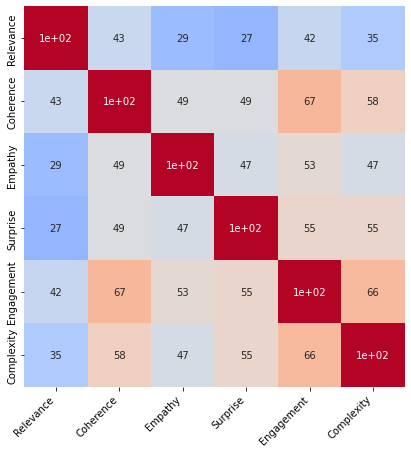

In [158]:
story_level_plot(human_scores, human_scores, 'Figures/fig1.jpg', 'kendall', (7,7))

#### Correlation matrix story level for Pearson criterion

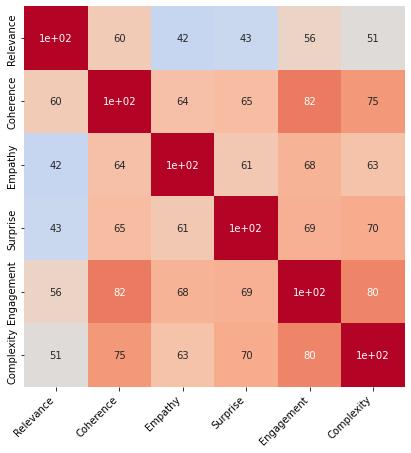

In [160]:
story_level_plot(human_scores, human_scores, 'Figures/fig1_pearson.jpg', 'pearson', (7,7))

#### Correlation matrix story level for spearman criterion

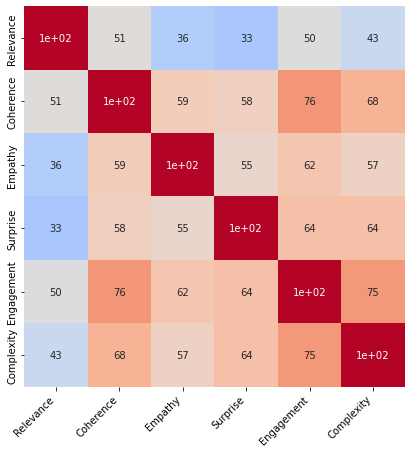

In [161]:
story_level_plot(human_scores, human_scores,'Figures/fig1_spearman.jpg',  'spearman', (7,7))

### Fig. 3: Story-level absolute Kendall correlations (%)

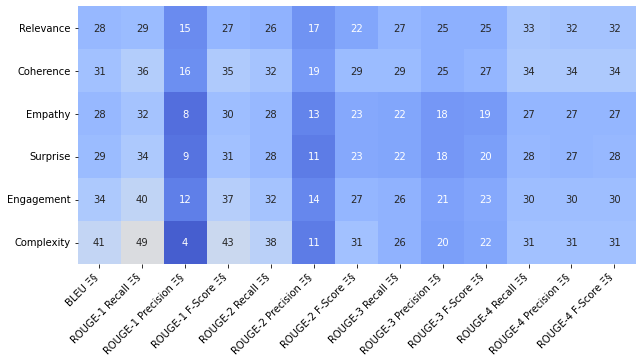

In [162]:
all_columns=data_scores.columns
automatic_metrics= all_columns[7:20]

story_level_plot(human_scores,automatic_metrics,'Figures/fig3.jpg', 'kendall', (10,20) )

### Fig. 5: Story-level absolute Kendall correlations (%) between metrics.

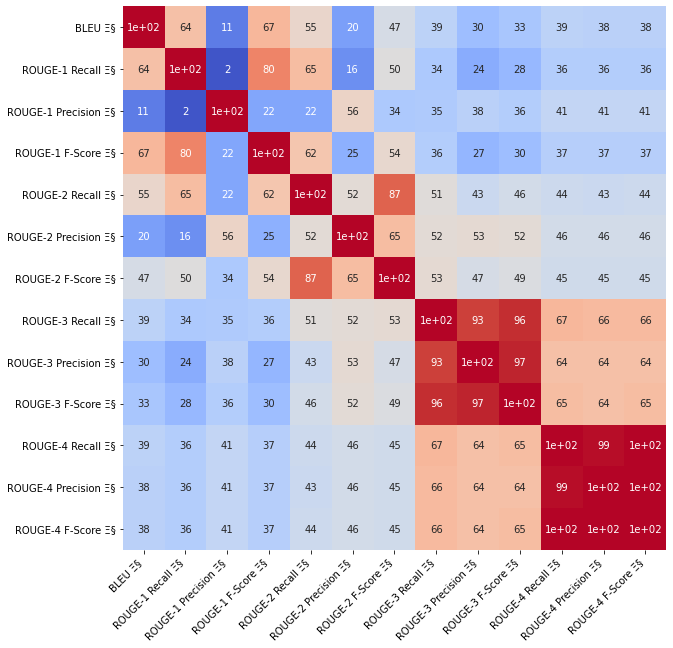

In [132]:
all_columns=data_scores.columns
automatic_metrics= all_columns[7:20]

story_level_plot(automatic_metrics,automatic_metrics, 'kendall', (10,10) )

## Table 4

In [14]:
N=len(human_scores)

data4=data_scores[human_scores]

means=np.zeros((11, N))
for i in range(N):
    for j in range(11):
        means[j,i]=np.mean(json.loads((data4[human_scores[i]].tolist())[j]))
means

array([[4.17013889, 4.42708333, 3.22222222, 3.15277778, 3.88194444,
        3.72916667],
       [2.45833333, 3.14236111, 2.28472222, 2.09027778, 2.67013889,
        2.40972222],
       [2.53819444, 2.92708333, 2.26041667, 1.93402778, 2.53472222,
        2.22569444],
       [2.40277778, 3.21875   , 2.36805556, 2.12847222, 2.75694444,
        2.49305556],
       [2.66666667, 3.3125    , 2.46875   , 2.21527778, 2.92013889,
        2.80208333],
       [2.80902778, 3.28819444, 2.47222222, 2.20833333, 2.86111111,
        2.67708333],
       [2.54166667, 3.21527778, 2.26736111, 2.125     , 2.73958333,
        2.40972222],
       [2.39236111, 2.87847222, 2.10069444, 1.95486111, 2.45833333,
        2.36111111],
       [2.09375   , 2.86458333, 1.98958333, 1.71875   , 2.27083333,
        1.92013889],
       [2.29166667, 2.38194444, 1.74305556, 1.55555556, 1.75      ,
        1.44791667],
       [2.50694444, 2.98958333, 2.07291667, 2.09722222, 2.58680556,
        2.49305556]])

## System-level correlation

In [79]:
# system-level correlation

def system_level_plot(metrics1,
                      metrics2,
                      criterion, 
                      plot_size=  (30,45)):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
            
            if criterion== 'kendall':
                
                k= kendalltau( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= round(100*k)
            elif criterion== 'pearson':
                
                k= pearsonr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= round(100*k)
            
            elif criterion== 'spearman':
                
                k= spearmanr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= round(100*k)

    plt.figure(figsize = plot_size)
    heatmap=sns.heatmap(corr_story_matrix, 
                    annot=True, 
                    cmap='coolwarm', square=True, vmin=0, vmax=100,
                    xticklabels=metrics2,
                    yticklabels=metrics1,cbar=False)


    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

    # Display the plot
    plt.show() 

### Fig. 2: System-level Kendall correlations (%)

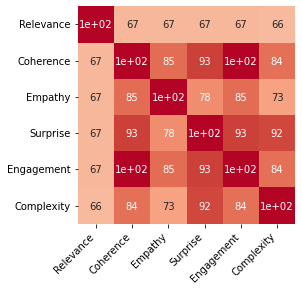

In [84]:
human_scores=['Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']

system_level_plot(human_scores,human_scores, 'kendall', (4,4) )

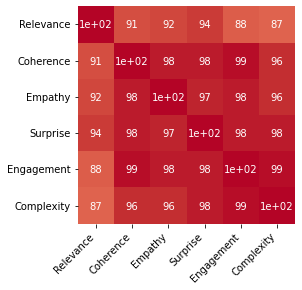

In [85]:
system_level_plot(human_scores,human_scores, 'pearson', (4,4) )

### Fig. 4: System-level absolute Kendall correlations (%) between metrics and criteria.

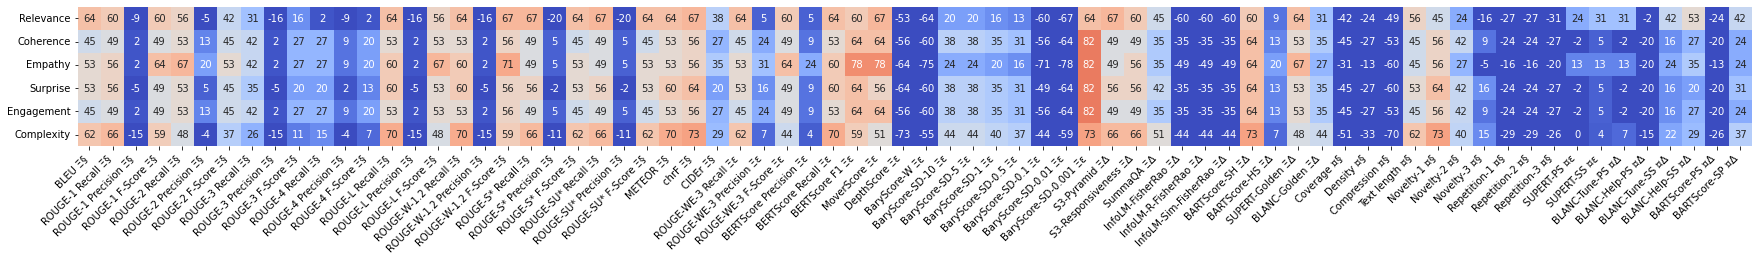

In [74]:
all_columns=data_scores.columns
automatic_metrics= all_columns[7:]

system_level_plot(human_scores,automatic_metrics, 'kendall', (10,45) )

### Fig. 6: System-level absolute Kendall correlations (%) between metrics.

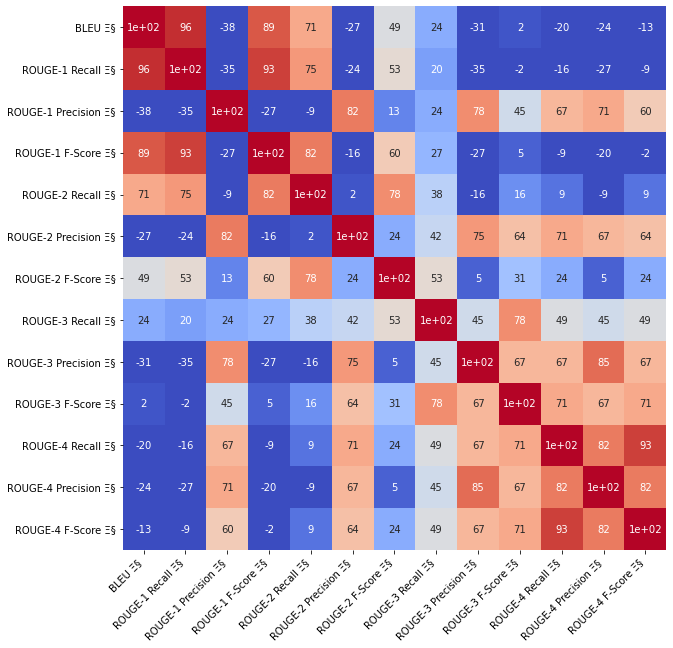

In [81]:
all_columns=data_scores.columns
automatic_metrics= all_columns[7:20]

system_level_plot(automatic_metrics,automatic_metrics, 'kendall', (10,10) )

### The Glass Ceiling of Automatic Evaluation in Natural Language Generation 

In [133]:
data_scores.columns

Index(['Model', 'Relevance', 'Coherence', 'Empathy', 'Surprise', 'Engagement',
       'Complexity', 'BLEU Ξ§', 'ROUGE-1 Recall Ξ§', 'ROUGE-1 Precision Ξ§',
       'ROUGE-1 F-Score Ξ§', 'ROUGE-2 Recall Ξ§', 'ROUGE-2 Precision Ξ§',
       'ROUGE-2 F-Score Ξ§', 'ROUGE-3 Recall Ξ§', 'ROUGE-3 Precision Ξ§',
       'ROUGE-3 F-Score Ξ§', 'ROUGE-4 Recall Ξ§', 'ROUGE-4 Precision Ξ§',
       'ROUGE-4 F-Score Ξ§', 'ROUGE-L Recall Ξ§', 'ROUGE-L Precision Ξ§',
       'ROUGE-L F-Score Ξ§', 'ROUGE-W-1.2 Recall Ξ§',
       'ROUGE-W-1.2 Precision Ξ§', 'ROUGE-W-1.2 F-Score Ξ§',
       'ROUGE-S* Recall Ξ§', 'ROUGE-S* Precision Ξ§', 'ROUGE-S* F-Score Ξ§',
       'ROUGE-SU* Recall Ξ§', 'ROUGE-SU* Precision Ξ§', 'ROUGE-SU* F-Score Ξ§',
       'METEOR Ξ§', 'chrF Ξ§', 'CIDEr Ξ§', 'ROUGE-WE-3 Recall Ξε',
       'ROUGE-WE-3 Precision Ξε', 'ROUGE-WE-3 F-Score Ξε',
       'BERTScore Precision Ξε', 'BERTScore Recall Ξε', 'BERTScore F1 Ξε',
       'MoverScore Ξε', 'DepthScore Ξε', 'BaryScore-W Ξε',
       'BaryScor

#### Let's find the best metric intra ROUGE metrics. 

In this data set there are 24 ROUGE metrics. In order to compare the ROUGE metrics against the oder metrics we first wanted to find the best one intra the ROUGE category. For that we looked into the story level and system level correlation between the ROUGE metrics and the human scores.

In [173]:
all_columns=data_scores.columns
rouge_metrics= all_columns[8:32]

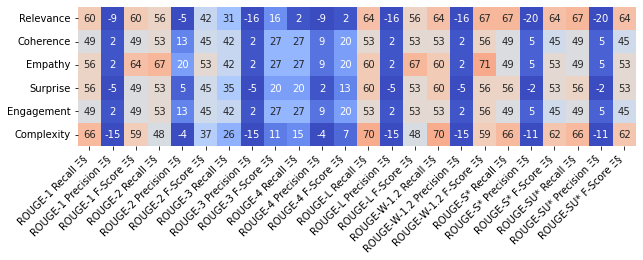

In [174]:

system_level_plot(human_scores,rouge_metrics, 'kendall', (10,10) )

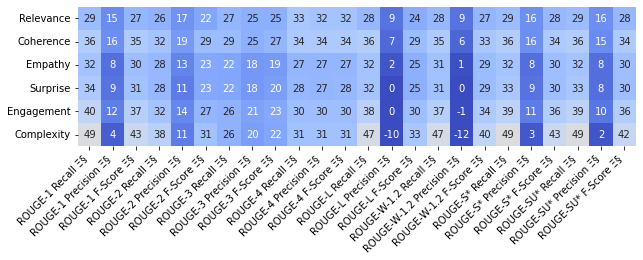

In [175]:
story_level_plot(human_scores,rouge_metrics, 'Figures/story_rouge_metrics','kendall', (10,10) )

In [200]:
def best_story_level(metrics1,
                      metrics2,
                      criterion):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
    
         
            if criterion== 'kendall':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())

            elif criterion== 'pearson':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=pearsonr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())
            
    
            elif criterion== 'spearman':
                k=np.zeros(96)
                for l in range(96):
                    k[l]=spearmanr(c_metric1[l],c_metric2[l] )[0]
                corr_story_matrix[i,j]= round(100*k.mean())
    
    df_corr = pd.DataFrame(corr_story_matrix,columns=metrics2)
 
    for i in range(len(df_corr)):
        sorted_columns = df_corr.iloc[i].nlargest(3).index.tolist()
        print(f"{metrics1[i]}:  {sorted_columns}")
   

In [201]:
best_story_level(human_scores,rouge_metrics, 'kendall')

Relevance:  ['ROUGE-4 Recall Ξ§', 'ROUGE-4 Precision Ξ§', 'ROUGE-4 F-Score Ξ§']
Coherence:  ['ROUGE-1 Recall Ξ§', 'ROUGE-L Recall Ξ§', 'ROUGE-S* Recall Ξ§']
Empathy:  ['ROUGE-1 Recall Ξ§', 'ROUGE-L Recall Ξ§', 'ROUGE-S* Recall Ξ§']
Surprise:  ['ROUGE-1 Recall Ξ§', 'ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§']
Engagement:  ['ROUGE-1 Recall Ξ§', 'ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§']
Complexity:  ['ROUGE-1 Recall Ξ§', 'ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§']


In [202]:
def best_system_level(metrics1,
                      metrics2,
                      criterion):
    # metrics 1 is a list with the names of the metric you want your lines to be
    # metrics 2 is a list with the names of the metric you want your columns to be
    # criterion is either 'kendall', 'spearman' or 'pearson'
    # plot_size is a tuple with the plot size you want
    
     
    N=len(metrics1)
    M=len(metrics2)
    corr_story_matrix= np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            c_metric1= np.array( [json.loads(l) for l in data_scores[metrics1[i]].tolist()]).T
            c_metric2= np.array( [json.loads(l) for l in data_scores[metrics2[j]].tolist()]).T
            
            if criterion== 'kendall':
                
                k= kendalltau( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= k
            elif criterion== 'pearson':
                
                k= pearsonr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= k
            
            elif criterion== 'spearman':
                
                k= spearmanr( np.mean(c_metric1, axis=0),np.mean(c_metric2, axis=0) )[0]
                corr_story_matrix[i,j]= k

    df_corr = pd.DataFrame(corr_story_matrix,columns=metrics2)
 
    for i in range(len(df_corr)):
        sorted_columns = df_corr.iloc[i].nlargest(3).index.tolist()
        print(f"{metrics1[i]}: {sorted_columns}")
   

In [208]:
best_system_level(human_scores,rouge_metrics, 'kendall')

Relevance: ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-S* Recall Ξ§', 'ROUGE-SU* Recall Ξ§']
Coherence: ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-2 Recall Ξ§', 'ROUGE-L Recall Ξ§']
Empathy: ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-2 Recall Ξ§', 'ROUGE-L F-Score Ξ§']
Surprise: ['ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§', 'ROUGE-1 Recall Ξ§']
Engagement: ['ROUGE-W-1.2 F-Score Ξ§', 'ROUGE-2 Recall Ξ§', 'ROUGE-L Recall Ξ§']
Complexity: ['ROUGE-L Recall Ξ§', 'ROUGE-W-1.2 Recall Ξ§', 'ROUGE-1 Recall Ξ§']


#### Fig 1: Correlation with humans over time considering all existing metrics combined

 
 
 'BLEU Ξ§', 2002
 
 'ROUGE-1 Recall Ξ§', 2004
 'ROUGE-1 Precision Ξ§',
 'ROUGE-1 F-Score Ξ§', 
 'ROUGE-2 Recall Ξ§', 
 'ROUGE-2 Precision Ξ§',
 'ROUGE-2 F-Score Ξ§', 
 'ROUGE-3 Recall Ξ§',
 'ROUGE-3 Precision Ξ§',
 'ROUGE-3 F-Score Ξ§', 
 'ROUGE-4 Recall Ξ§', 
 'ROUGE-4 Precision Ξ§',
 'ROUGE-4 F-Score Ξ§', 
 'ROUGE-L Recall Ξ§', 
 'ROUGE-L Precision Ξ§',
 'ROUGE-L F-Score Ξ§', 
 'ROUGE-W-1.2 Recall Ξ§',
 'ROUGE-W-1.2 Precision Ξ§', 
 'ROUGE-W-1.2 F-Score Ξ§',
 'ROUGE-S* Recall Ξ§', 
 'ROUGE-S* Precision Ξ§', 
 'ROUGE-S* F-Score Ξ§',
 'ROUGE-SU* Recall Ξ§', 
 'ROUGE-SU* Precision Ξ§', 
 'ROUGE-SU* F-Score Ξ§',
 
 'METEOR Ξ§', 2005
 
 'chrF Ξ§', 2015
 
 'CIDEr Ξ§', 2015
 
 'ROUGE-WE-3 Recall Ξε', 2015
 'ROUGE-WE-3 Precision Ξε', 
 'ROUGE-WE-3 F-Score Ξε',
 
 
   'S3-Pyramid ΞΔ', 2017
   'S3-Responsiveness ΞΔ',
   
   
  'Coverage ¤§', 2018
  'Density ¤§',2018
   'Compression ¤§', 2018
 
  'MoverScore Ξε', 2019
 
   'SummaQA ΞΔ', 2019
 
 'BERTScore Precision Ξε', 2020
 'BERTScore Recall Ξε', 
 'BERTScore F1 Ξε',
 
   'SUPERT-Golden ΞΔ',  2020
   'SUPERT-PS ¤ε',  2020
   'SUPERT-SS ¤ε', 
   
  'BLANC-Golden ΞΔ', 2020
   'BLANC-Tune-PS ¤Δ', 
   'BLANC-Help-PS ¤Δ',
  'BLANC-Tune-SS ¤Δ', 
  'BLANC-Help-SS ¤Δ', 
  'BARTScore-PS ¤Δ',
   'BARTScore-SP ¤Δ'

 'DepthScore Ξε', 2021
 
 'BaryScore-W Ξε', 2021
  'BaryScore-SD-10 Ξε',
  'BaryScore-SD-5 Ξε', 
  'BaryScore-SD-1 Ξε',
   'BaryScore-SD-0.5 Ξε', 
   'BaryScore-SD-0.1 Ξε', 
   'BaryScore-SD-0.01 Ξε',
   'BaryScore-SD-0.001 Ξε',
   
   'BARTScore-SH ΞΔ', 2021
  'BARTScore-HS ΞΔ',
 
 
   'Text length ¤§', 2021
   'Novelty-1 ¤§',  2021
   'Novelty-2 ¤§',
  'Novelty-3 ¤§', 
  'Repetition-1 ¤§',  2021
  'Repetition-2 ¤§', 
  'Repetition-3 ¤§',

  'InfoLM-FisherRao ΞΔ', 2022
  'InfoLM-R-FisherRao ΞΔ',
  'InfoLM-Sim-FisherRao ΞΔ', 
  

In [135]:
#BLEU (2002) ROUGE (2004) JS (2006) ROUGE-WE (2015) Chrfp (2017)
#S3 (2017) MoverScore (2019) BERTScore (2020) 
 
time_metrics=[ 'BLEU Ξ§', 'ROUGE-S* Recall Ξ§',  'ROUGE-WE-3 Recall Ξε', 'chrF Ξ§',  'S3-Pyramid ΞΔ',  'MoverScore Ξε',
 'BERTScore Precision Ξε']


M=len(time_metrics)
corr=[]

for j in range(M):
    c_metric1= np.array( [json.loads(l) for l in data_scores['Relevance'].tolist()]).T
    c_metric2= np.array( [json.loads(l) for l in data_scores[time_metrics[j]].tolist()]).T
    

    k=np.zeros(96)
    for l in range(96):
        k[l]=kendalltau(c_metric1[l],c_metric2[l] )[0]
    corr.append(k.mean())

print(corr)
#let see story correlation first 



[0.2805911991125592, 0.2862424384996932, 0.28866265490244936, 0.29432956922099374, 0.2899203243483038, 0.3225688338836085, 0.19764662354233542]


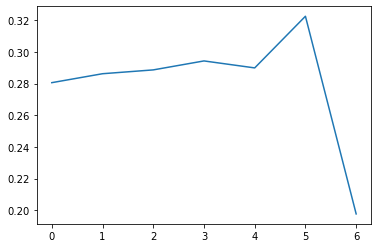

In [136]:
plt.plot(corr)

### Using genre 

If we want to identify the genre of these stories we need to perform unsupervised clustering or topic modeling to group similar stories together based on their content, which can give us some indication of their genre. Here we will use the K-means clustering algorithm to cluster our stories based on their content.


In [15]:
len(data_annotations['Human'].unique())
unique_data= data_annotations['Human'].unique()
unique_data_prompt= data_annotations['Prompt'].unique()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

unique_data= data_annotations['Human'].unique()


# Define a list of stories
stories = unique_data

# Convert the stories into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stories)

# Use K-means clustering to group the stories into three clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Print the predicted cluster labels for each story
for i, label in enumerate(kmeans.labels_):
    print("Story", i+1, "belongs to cluster", label+1)


Story 1 belongs to cluster 2
Story 2 belongs to cluster 2
Story 3 belongs to cluster 2
Story 4 belongs to cluster 3
Story 5 belongs to cluster 2
Story 6 belongs to cluster 3
Story 7 belongs to cluster 2
Story 8 belongs to cluster 1
Story 9 belongs to cluster 3
Story 10 belongs to cluster 5
Story 11 belongs to cluster 3
Story 12 belongs to cluster 2
Story 13 belongs to cluster 2
Story 14 belongs to cluster 3
Story 15 belongs to cluster 5
Story 16 belongs to cluster 3
Story 17 belongs to cluster 2
Story 18 belongs to cluster 4
Story 19 belongs to cluster 2
Story 20 belongs to cluster 4
Story 21 belongs to cluster 4
Story 22 belongs to cluster 5
Story 23 belongs to cluster 3
Story 24 belongs to cluster 3
Story 25 belongs to cluster 1
Story 26 belongs to cluster 2
Story 27 belongs to cluster 4
Story 28 belongs to cluster 4
Story 29 belongs to cluster 3
Story 30 belongs to cluster 3
Story 31 belongs to cluster 2
Story 32 belongs to cluster 4
Story 33 belongs to cluster 1
Story 34 belongs to

In [17]:
import spacy

# Load the pre-trained model for English
nlp = spacy.load('en_core_web_sm')

# Define a list of stories
stories = unique_data_prompt

# Define a function to classify the genre of a story
def classify_genre(story):
    doc = nlp(story)
    genres = ['comedy', 'drama', 'horror', 'romance', 'sci-fi']
    scores = [doc.cats.get(genre, 0.0) for genre in genres]
    max_score = max(scores)
    if max_score > 0.2:
        return genres[scores.index(max_score)]
    else:
        return 'unknown'

l=[]
# Classify the genre of each story
for story in stories:
    genre = classify_genre(story)
    l.append(genre)
    
print(l)


['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown'

In [18]:
from textblob import TextBlob


# Define threshold values
positive_threshold = 0.2
negative_threshold = -0.2

# Define some sample text
text = "This movie was really great! I loved it."

l=[]
for i in range(len(unique_data_prompt)):
    blob = TextBlob(unique_data_prompt[i])
    # Get the sentiment score
    sentiment_score = blob.sentiment.polarity

    # Classify the story based on the sentiment score
    if sentiment_score >= positive_threshold:
        category = "positive"
    elif sentiment_score <= negative_threshold:
        category = "negative"
    else:
        category = "neutral"
    l.append(category)

# Print the sentiment score
print(l)

['positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutr

we find that prompts are fairly
generic compared to human prompts.

# Let's try to apply Bary score and Depth Score to our trained model